In [1]:
from glob import glob

from PIL import Image

file_paths = []
ellipse_data = []

label_files = glob("../data/FDDB-labels/*.txt")

for fn in label_files:
    with open(fn) as f:
        if "ellipseList" not in fn:
            file_paths += [p.strip("\n") for p in f.readlines()]
        else:
            ellipse_data += [p.strip("\n") for p in f.readlines()]

ellipse_data

['2002/08/16/big/img_932',
 '2',
 '145.817100 105.362596 1.464612 110.634000 145.392203  1',
 '155.625600 92.213498 1.167621 313.828900 301.929701  1',
 '2002/07/19/big/img_393',
 '1',
 '72.270948 45.361083 -1.396263 198.866267 282.220968  1',
 '2002/08/20/big/img_764',
 '1',
 '139.615112 84.005900 1.461123 155.563732 175.006491  1',
 '2002/08/15/big/img_616',
 '2',
 '85.055594 51.739100 -1.509937 76.808899 114.772800  1',
 '77.924801 49.476000 1.370129 172.477702 106.657700  1',
 '2002/07/26/big/img_267',
 '1',
 '68.801153 50.130479 1.525216 179.129085 155.036308  1',
 '2002/07/27/big/img_1069',
 '5',
 '52.720733 35.096522 -1.488120 229.916653 80.514106  1',
 '56.014193 37.286713 1.321621 365.767206 63.944649  1',
 '37.773330 27.127782 -1.385084 318.835060 84.103626  1',
 '24.780970 16.859626 1.412422 167.432432 82.364864  1',
 '29.907063 21.962038 -1.498505 273.762119 94.090191  1',
 '2002/08/14/big/img_1041',
 '1',
 '115.564900 86.843854 -1.543614 134.795559 136.162719  1',
 '2003/0

In [2]:
import pandas as pd


In [4]:
pdf_file_paths = pd.DataFrame({"path": file_paths})
pdf_file_paths["path_idx"] = pdf_file_paths.index

pdf_ellipse_data = pd.DataFrame({"data": ellipse_data})
pdf_ellipse_data["data_idx"] = pdf_ellipse_data.index

In [5]:
pdf_file_data_mapping = pdf_file_paths.merge(pdf_ellipse_data, left_on="path", right_on="data", how="left")

In [6]:
ellipse_dict = {str(k): [] for k in pdf_file_paths["path"]}
ellipse_dict

{'2002/07/22/big/img_43': [],
 '2002/07/26/big/img_634': [],
 '2002/07/19/big/img_843': [],
 '2002/08/26/big/img_58': [],
 '2002/07/21/big/img_375': [],
 '2002/08/25/big/img_729': [],
 '2002/07/19/big/img_561': [],
 '2003/01/15/big/img_884': [],
 '2002/07/25/big/img_891': [],
 '2002/08/09/big/img_558': [],
 '2002/08/26/big/img_587': [],
 '2002/08/13/big/img_1146': [],
 '2002/09/02/big/img_15153': [],
 '2002/07/26/big/img_316': [],
 '2002/08/01/big/img_1940': [],
 '2002/08/26/big/img_90': [],
 '2003/01/13/big/img_347': [],
 '2002/07/25/big/img_520': [],
 '2002/08/29/big/img_18718': [],
 '2002/08/28/big/img_19219': [],
 '2002/08/13/big/img_375': [],
 '2002/07/20/big/img_719': [],
 '2002/08/31/big/img_17431': [],
 '2002/07/28/big/img_192': [],
 '2002/08/26/big/img_259': [],
 '2002/08/18/big/img_484': [],
 '2002/07/29/big/img_580': [],
 '2002/07/26/big/img_84': [],
 '2002/08/02/big/img_302': [],
 '2002/08/31/big/img_17007': [],
 '2003/01/15/big/img_543': [],
 '2002/09/01/big/img_16488': []

In [7]:
for i, r in pdf_file_data_mapping.iterrows():
    data_idx = r["data_idx"]
    num_ellipses = int(ellipse_data[data_idx + 1])
    file_path = r["path"]
    for j in range(data_idx + 2, data_idx + num_ellipses + 2):
        ellipse_dict[file_path].append([float(v) for v in ellipse_data[j].split(" ") if len(v)>0])

In [8]:
ellipse_dict

{'2002/07/22/big/img_43': [[68.845166,
   45.107425,
   -1.5195,
   237.403203,
   104.586373,
   1.0]],
 '2002/07/26/big/img_634': [[58.026604,
   29.848244,
   1.564788,
   160.086187,
   99.924362,
   1.0],
  [58.107042, 41.35218, -1.477586, 304.375877, 98.610082, 1.0]],
 '2002/07/19/big/img_843': [[72.738804,
   50.801495,
   -1.48353,
   109.79147,
   116.055719,
   1.0],
  [43.53961, 31.193603, -1.570796, 255.93689, 58.924347, 1.0],
  [71.341092, 54.101381, 1.48353, 380.417913, 108.316394, 1.0]],
 '2002/08/26/big/img_58': [[54.321004,
   33.8562,
   -1.531727,
   136.8906,
   66.157617,
   1.0]],
 '2002/07/21/big/img_375': [[144.739384,
   100.919323,
   1.342349,
   199.811122,
   163.78,
   1.0]],
 '2002/08/25/big/img_729': [[64.0851, 48.0, -1.184211, 105.8417, 105.818, 1.0],
  [62.271714, 40.278, -1.352152, 202.3818, 82.2663, 1.0],
  [61.799769, 41.750174, -1.527464, 382.797696, 106.106305, 1.0]],
 '2002/07/19/big/img_561': [[89.98374,
   71.193839,
   1.239184,
   150.599548,

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_name = "2002/07/19/big/img_392"

img = Image.open(f"../data/FDDB-images/{img_name}.jpg")
img_array = np.array(img)

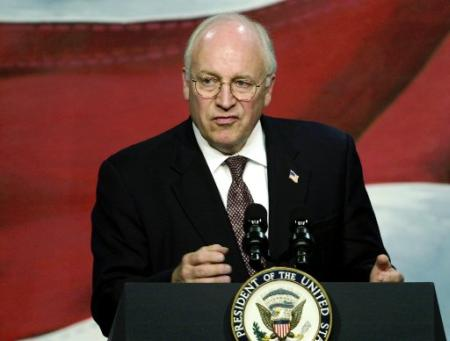

In [10]:
img

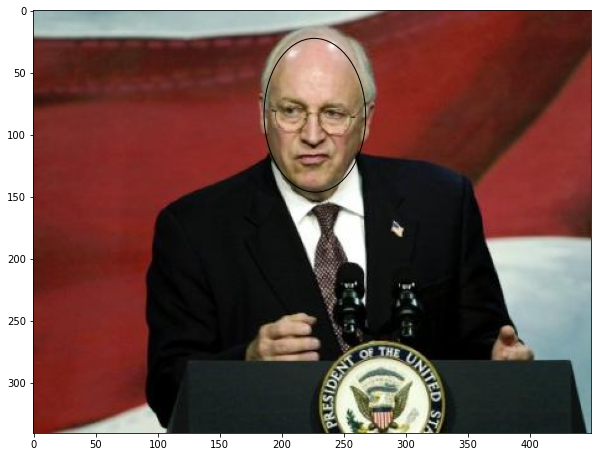

In [24]:
from matplotlib.collections import EllipseCollection

fig, ax = plt.subplots(figsize=(10, 10))
for ed in ellipse_dict[img_name]:
    major_axis_radius, minor_axis_radius, angle, center_x, center_y, _ = ed

    ec = EllipseCollection(major_axis_radius*2, minor_axis_radius*2, np.degrees(angle), units='xy', offsets=(center_x, center_y),
                               transOffset=ax.transData, facecolors="None")
    ax.add_collection(ec)
ax.imshow(img, cmap="gray")

In [25]:
type(ax)

matplotlib.axes._subplots.AxesSubplot